In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv("E:\promotion_train.csv")
df2=pd.read_csv("E:\promotion_test.csv")
df=pd.concat([df1,df2],keys=("train","test"))

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [2]:
df.head()

KPIs_met >80%  age  avg_training_score  awards_won?  \
train 0              1   35                  49            0   
      1              0   30                  60            0   
      2              0   34                  50            0   
      3              0   39                  50            0   
      4              0   45                  73            0   

                department         education  employee_id gender  is_promoted  \
train 0  Sales & Marketing  Master's & above        65438      f          0.0   
      1         Operations        Bachelor's        65141      m          0.0   
      2  Sales & Marketing        Bachelor's         7513      m          0.0   
      3  Sales & Marketing        Bachelor's         2542      m          0.0   
      4         Technology        Bachelor's        48945      m          0.0   

         length_of_service  no_of_trainings  previous_year_rating  \
train 0                  8                1                   5.0   
      1                  4                1                   5.0   
      2                  7                1                   3.0   
      3                 10                2                   1.0   
      4                  2                1                   3.0   

        recruitment_channel     region  
train 0            sourcing   region_7  
      1               other  region_22  
      2            sourcing  region_19  
      3               other  region_23  
      4               other  region_26

In [3]:
df.isnull().sum()

KPIs_met >80%               0
age                         0
avg_training_score          0
awards_won?                 0
department                  0
education                3443
employee_id                 0
gender                      0
is_promoted             23490
length_of_service           0
no_of_trainings             0
previous_year_rating     5936
recruitment_channel         0
region                      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78298 entries, (train, 0) to (test, 23489)
Data columns (total 14 columns):
KPIs_met >80%           78298 non-null int64
age                     78298 non-null int64
avg_training_score      78298 non-null int64
awards_won?             78298 non-null int64
department              78298 non-null object
education               74855 non-null object
employee_id             78298 non-null int64
gender                  78298 non-null object
is_promoted             54808 non-null float64
length_of_service       78298 non-null int64
no_of_trainings         78298 non-null int64
previous_year_rating    72362 non-null float64
recruitment_channel     78298 non-null object
region                  78298 non-null object
dtypes: float64(2), int64(7), object(5)
memory usage: 9.2+ MB


In [5]:
df["awards_won"]=df["awards_won?"].copy()
df["KPI"]=df["KPIs_met >80%"].copy()

In [6]:
df=df.drop(["awards_won?"],axis=1)


In [7]:
df=df.drop(["KPIs_met >80%"],axis=1)

In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])


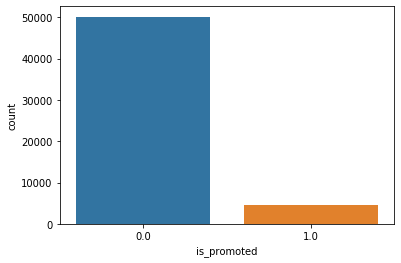

In [9]:
sns.countplot(x="is_promoted",data=df)


In [18]:
df["previous_year_rating"].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78298 entries, (train, 0) to (test, 23489)
Data columns (total 14 columns):
age                     78298 non-null int64
avg_training_score      78298 non-null int64
department              78298 non-null object
education               74855 non-null object
employee_id             78298 non-null int64
gender                  78298 non-null int32
is_promoted             54808 non-null float64
length_of_service       78298 non-null int64
no_of_trainings         78298 non-null int64
previous_year_rating    72362 non-null float64
recruitment_channel     78298 non-null object
region                  78298 non-null object
awards_won              78298 non-null int64
KPI                     78298 non-null int64
dtypes: float64(2), int32(1), int64(7), object(4)
memory usage: 8.9+ MB


In [20]:
df.corr()

,age,avg_training_score,employee_id,gender,is_promoted,length_of_service,no_of_trainings,previous_year_rating,awards_won,KPI
age,1.000000,-0.044592,0.000586,-0.017816,-0.017166,0.653339,-0.082536,0.009137,-0.007357,-0.026223
avg_training_score,-0.044592,1.000000,-0.003930,-0.024840,0.181147,-0.035272,0.044180,0.071813,0.072655,0.076729
employee_id,0.000586,-0.003930,1.000000,-0.000263,0.001206,0.004420,-0.005216,0.001372,0.005943,0.000127
gender,-0.017816,-0.024840,-0.000263,1.000000,-0.011109,-0.017800,0.084530,-0.023656,0.000553,-0.037916
is_promoted,-0.017166,0.181147,0.001206,-0.011109,1.000000,-0.010670,-0.024896,0.159320,0.195871,0.221582
length_of_service,0.653339,-0.035272,0.004420,-0.017800,-0.010670,1.000000,-0.058403,0.001063,-0.040556,-0.077854
no_of_trainings,-0.082536,0.044180,-0.005216,0.084530,-0.024896,-0.058403,1.000000,-0.058439,-0.004818,-0.043912
previous_year_rating,0.009137,0.071813,0.001372,-0.023656,0.159320,0.001063,-0.058439,1.000000,0.027636,0.350921
awards_won,-0.007357,0.072655,0.005943,0.000553,0.195871,-0.040556,-0.004818,0.027636,1.000000,0.100365
KPI,-0.026223,0.076729,0.000127,-0.037916,0.221582,-0.077854,-0.043912,0.350921,0.100365,1.000000


In [21]:
df[df["education"]=="Bachelor's"]['department'].value_counts()

Sales & Marketing    15917
Operations           11079
Technology            6558
Procurement           6200
Analytics             5681
Finance               2683
HR                    2210
Legal                 1150
R&D                    769
Name: department, dtype: int64

In [22]:
df.education[(df.education.isna())&(df.age<=26)]="Bachelor's"

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df.education[(df.education.isna())&(df.age>26)]="Master's & above"

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78298 entries, (train, 0) to (test, 23489)
Data columns (total 14 columns):
age                     78298 non-null int64
avg_training_score      78298 non-null int64
department              78298 non-null object
education               78298 non-null object
employee_id             78298 non-null int64
gender                  78298 non-null int32
is_promoted             54808 non-null float64
length_of_service       78298 non-null int64
no_of_trainings         78298 non-null int64
previous_year_rating    72362 non-null float64
recruitment_channel     78298 non-null object
region                  78298 non-null object
awards_won              78298 non-null int64
KPI                     78298 non-null int64
dtypes: float64(2), int32(1), int64(7), object(4)
memory usage: 8.9+ MB


In [25]:
df.isnull().sum()

age                         0
avg_training_score          0
department                  0
education                   0
employee_id                 0
gender                      0
is_promoted             23490
length_of_service           0
no_of_trainings             0
previous_year_rating     5936
recruitment_channel         0
region                      0
awards_won                  0
KPI                         0
dtype: int64

In [26]:
df["previous_year_rating"].mode()[0]

3.0

In [27]:
df.corr()

,age,avg_training_score,employee_id,gender,is_promoted,length_of_service,no_of_trainings,previous_year_rating,awards_won,KPI
age,1.000000,-0.044592,0.000586,-0.017816,-0.017166,0.653339,-0.082536,0.009137,-0.007357,-0.026223
avg_training_score,-0.044592,1.000000,-0.003930,-0.024840,0.181147,-0.035272,0.044180,0.071813,0.072655,0.076729
employee_id,0.000586,-0.003930,1.000000,-0.000263,0.001206,0.004420,-0.005216,0.001372,0.005943,0.000127
gender,-0.017816,-0.024840,-0.000263,1.000000,-0.011109,-0.017800,0.084530,-0.023656,0.000553,-0.037916
is_promoted,-0.017166,0.181147,0.001206,-0.011109,1.000000,-0.010670,-0.024896,0.159320,0.195871,0.221582
length_of_service,0.653339,-0.035272,0.004420,-0.017800,-0.010670,1.000000,-0.058403,0.001063,-0.040556,-0.077854
no_of_trainings,-0.082536,0.044180,-0.005216,0.084530,-0.024896,-0.058403,1.000000,-0.058439,-0.004818,-0.043912
previous_year_rating,0.009137,0.071813,0.001372,-0.023656,0.159320,0.001063,-0.058439,1.000000,0.027636,0.350921
awards_won,-0.007357,0.072655,0.005943,0.000553,0.195871,-0.040556,-0.004818,0.027636,1.000000,0.100365
KPI,-0.026223,0.076729,0.000127,-0.037916,0.221582,-0.077854,-0.043912,0.350921,0.100365,1.000000


In [28]:
df.KPI.value_counts()

0    50578
1    27720
Name: KPI, dtype: int64

In [29]:
#df.previous_year_rating[(df.previous_year_rating.isna())&(df.awards_won==1)&(df.KPI==1)]=5

In [30]:
#df.previous_year_rating[(df.previous_year_rating.isna())&(df.awards_won==0)&(df.KPI==1)]=4

In [31]:
#df.previous_year_rating[(df.previous_year_rating.isna())&(df.awards_won==1)&(df.KPI==0)]=3

In [32]:
df.isnull().sum()

age                         0
avg_training_score          0
department                  0
education                   0
employee_id                 0
gender                      0
is_promoted             23490
length_of_service           0
no_of_trainings             0
previous_year_rating     5936
recruitment_channel         0
region                      0
awards_won                  0
KPI                         0
dtype: int64

In [33]:
df.previous_year_rating.value_counts() 

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [34]:
#df.previous_year_rating[(df.previous_year_rating.isna())&(df.awards_won==0)&(df.KPI==0)&(df.age>=35)]=3

In [35]:
#df.previous_year_rating[(df.previous_year_rating.isna())&(df.awards_won==0)&(df.KPI==0)&(df.age<35)&(df.age>=25)]=2

In [36]:
#df.previous_year_rating[(df.previous_year_rating.isna())&(df.awards_won==0)&(df.KPI==0)&(df.age<25)]=1

In [37]:
df["previous_year_rating"].fillna("3",inplace=True)

In [38]:
df.isnull().sum()

age                         0
avg_training_score          0
department                  0
education                   0
employee_id                 0
gender                      0
is_promoted             23490
length_of_service           0
no_of_trainings             0
previous_year_rating        0
recruitment_channel         0
region                      0
awards_won                  0
KPI                         0
dtype: int64

In [44]:
#df.previous_year_rating[(df.previous_year_rating.isna())&(df.awards_won==0)&(df.KPI==0)&(df.age<35)&(df.age>25)]=1
df["previous_year_rating"]=df["previous_year_rating"].astype(int)

In [47]:
df["performance"]=df["KPI"]+df["awards_won"]+df["previous_year_rating"]
df["total training"]=df["avg_training_score"]*df["no_of_trainings"]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78298 entries, (train, 0) to (test, 23489)
Data columns (total 16 columns):
age                     78298 non-null int64
avg_training_score      78298 non-null int64
department              78298 non-null object
education               78298 non-null object
employee_id             78298 non-null int64
gender                  78298 non-null int32
is_promoted             54808 non-null float64
length_of_service       78298 non-null int64
no_of_trainings         78298 non-null int64
previous_year_rating    78298 non-null int32
recruitment_channel     78298 non-null object
region                  78298 non-null object
awards_won              78298 non-null int64
KPI                     78298 non-null int64
performance             78298 non-null int64
total training          78298 non-null int64
dtypes: float64(1), int32(2), int64(9), object(4)
memory usage: 9.8+ MB


In [49]:
df=df.drop(["recruitment_channel","region"],axis=1)

In [50]:
df_dum=pd.get_dummies(df[df.select_dtypes(include=["object"]).columns.tolist()])
df_num=df[df.select_dtypes(include=["number"]).columns.tolist()]
ddf=pd.concat([df_num,df_dum],axis=1)

In [51]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78298 entries, (train, 0) to (test, 23489)
Data columns (total 24 columns):
age                             78298 non-null int64
avg_training_score              78298 non-null int64
employee_id                     78298 non-null int64
gender                          78298 non-null int32
is_promoted                     54808 non-null float64
length_of_service               78298 non-null int64
no_of_trainings                 78298 non-null int64
previous_year_rating            78298 non-null int32
awards_won                      78298 non-null int64
KPI                             78298 non-null int64
performance                     78298 non-null int64
total training                  78298 non-null int64
department_Analytics            78298 non-null uint8
department_Finance              78298 non-null uint8
department_HR                   78298 non-null uint8
department_Legal                78298 non-null uint8
department_Operations   

In [52]:
x=ddf.drop(["is_promoted","employee_id"],axis=1)

In [53]:
y=ddf["is_promoted"]

In [54]:
x_train=x.iloc[:54808,:]
x_test=x.iloc[54808:,:]

In [55]:
x_train.isnull().sum()

age                             0
avg_training_score              0
gender                          0
length_of_service               0
no_of_trainings                 0
previous_year_rating            0
awards_won                      0
KPI                             0
performance                     0
total training                  0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Bachelor's            0
education_Below Secondary       0
education_Master's & above      0
dtype: int64

In [56]:
y_train=y.iloc[:54808,]
y_test=y.iloc[:54808,]

In [41]:
from sklearn.linear_model import LogisticRegression

In [136]:
lr=LogisticRegression(class_weight="balanced")
lr.fit(x_train,y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
y_train_pred=lr.predict(x_train)

In [138]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score


In [139]:
acc=accuracy_score(y_train,y_train_pred)
acc

0.7648153554225661

In [553]:
y_pred=lr.predict(x_test)

In [554]:
w1=pd.DataFrame(y_pred)
w2=pd.DataFrame(df2["employee_id"])
w=pd.concat([w1,w2],axis=1)
w.to_csv('E:/promo.csv')

In [555]:
from sklearn import tree


In [556]:
dt=tree.DecisionTreeClassifier()

In [557]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [558]:
y_train_pred1=dt.predict(x_train)


In [559]:
acc1=accuracy_score(y_train_pred1,y_train)
acc1

0.9997628083491461

In [560]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)
y_train_pred2=rf.predict(x_train)
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
a1=accuracy_score(y_train,y_train_pred2)
a1

0.9899102320829076

In [561]:
y_pred2=rf.predict(x_test)

In [562]:
w1=pd.DataFrame(y_pred2)
w2=pd.DataFrame(df2["employee_id"])
w=pd.concat([w2,w1],axis=1)
w.to_csv('E:/promo1.csv')

In [57]:
from sklearn.svm import SVC

In [58]:
classifier=SVC(kernel="rbf")

In [59]:
classifier.fit(x_train,y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
y_pred0=classifier.predict(x_test)

In [61]:
w1=pd.DataFrame(y_pred0)
w2=pd.DataFrame(df2["employee_id"])
w=pd.concat([w2,w1],axis=1)
w.to_csv('E:/promoo.csv')

In [41]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(x_train,y_train)
y_pred9=classifier.predict(x_test)
w1=pd.DataFrame(y_pred9)
w2=pd.DataFrame(df2["employee_id"])
w=pd.concat([w2,w1],axis=1)
w.to_csv('E:/promoo1.csv')

In [63]:
!pip install lightgbm

In [65]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [70]:
from sklearn.metrics import accuracy_score
predict_train = model.predict(x_train)
accuracy_train = accuracy_score(y_train,predict_train)

In [71]:
print(accuracy_train)

0.9446796088162313


In [72]:
predict_test = model.predict(x_test)

In [73]:
w1=pd.DataFrame(predict_test)
w2=pd.DataFrame(df2["employee_id"])
w=pd.concat([w2,w1],axis=1)
w.to_csv('E:/promoo2.csv')